Para la reunión del 1ro de diciembre

In [14]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles
using Random

Lista de tareas
1. crear poset random
2. calcular extensiones lineales
3. calcular un poset $\alpha = 0.98$
4. recordar como se usa la entropia borrosa 

# Caso 1

In [3]:
posetrandom = Array( caminata_poset(10,10^2) )

10×10 Array{Int64,2}:
 0  1  1  0  0  1  0  0  1  1
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  1  1  0  1
 0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  1
 0  0  1  0  0  1  0  1  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [4]:
lista_extensioneslineales = [caminatale(posetrandom, 10^2) for _ in 1:10^3]|>unique!

47-element Array{Array{Int64,1},1}:
 [5, 4, 7, 1, 6, 10, 3, 2, 8, 9]
 [5, 4, 1, 7, 6, 10, 3, 2, 8, 9]
 [1, 4, 7, 5, 6, 10, 3, 2, 8, 9]
 [5, 4, 7, 1, 6, 3, 10, 2, 8, 9]
 [5, 4, 7, 1, 6, 10, 2, 3, 8, 9]
 [4, 5, 7, 1, 6, 10, 3, 2, 8, 9]
 [1, 2, 4, 7, 5, 6, 8, 3, 10, 9]
 [5, 4, 7, 1, 6, 2, 8, 10, 3, 9]
 [5, 1, 4, 7, 6, 10, 3, 2, 8, 9]
 [5, 4, 7, 1, 6, 2, 3, 8, 10, 9]
 [5, 4, 7, 1, 6, 2, 10, 3, 8, 9]
 [5, 4, 7, 1, 6, 2, 3, 10, 8, 9]
 [1, 4, 7, 5, 6, 3, 10, 2, 8, 9]
 ⋮
 [5, 4, 1, 7, 6, 2, 10, 8, 3, 9]
 [5, 1, 4, 7, 6, 3, 2, 10, 8, 9]
 [1, 4, 7, 6, 10, 5, 2, 3, 8, 9]
 [4, 1, 2, 7, 6, 8, 9, 10, 5, 3]
 [5, 4, 7, 1, 2, 6, 3, 10, 8, 9]
 [4, 7, 1, 6, 2, 10, 5, 8, 3, 9]
 [5, 1, 2, 4, 7, 6, 3, 10, 8, 9]
 [5, 4, 7, 1, 6, 2, 3, 8, 9, 10]
 [1, 2, 4, 7, 5, 6, 3, 8, 9, 10]
 [4, 5, 7, 1, 6, 3, 10, 2, 8, 9]
 [1, 4, 7, 6, 2, 10, 5, 3, 8, 9]
 [1, 4, 7, 6, 5, 10, 3, 2, 8, 9]

In [25]:
lista_extensioneslineales2 = [caminatale(posetrandom, 10^2) for _ in 1:10^4]|>unique!

207-element Array{Array{Int64,1},1}:
 [5, 4, 7, 1, 6, 10, 3, 2, 8, 9]
 [4, 5, 7, 1, 6, 10, 3, 2, 8, 9]
 [5, 4, 7, 1, 6, 3, 10, 2, 8, 9]
 [4, 7, 1, 6, 5, 2, 10, 8, 9, 3]
 [5, 4, 7, 1, 6, 2, 3, 10, 8, 9]
 [5, 4, 1, 7, 6, 2, 3, 10, 8, 9]
 [4, 7, 1, 2, 6, 5, 3, 8, 10, 9]
 [5, 4, 1, 7, 6, 10, 3, 2, 8, 9]
 [1, 4, 7, 5, 6, 10, 3, 2, 8, 9]
 [5, 4, 7, 1, 6, 10, 2, 3, 8, 9]
 [1, 4, 2, 5, 7, 6, 3, 10, 8, 9]
 [4, 5, 7, 1, 6, 3, 10, 2, 8, 9]
 [1, 5, 4, 2, 7, 8, 6, 9, 3, 10]
 ⋮
 [1, 2, 4, 7, 6, 10, 8, 9, 5, 3]
 [5, 4, 1, 7, 6, 2, 10, 3, 8, 9]
 [1, 4, 7, 6, 10, 2, 5, 8, 3, 9]
 [1, 5, 2, 4, 7, 8, 6, 3, 10, 9]
 [4, 7, 5, 1, 2, 6, 3, 8, 10, 9]
 [4, 1, 5, 7, 6, 2, 8, 9, 3, 10]
 [1, 4, 5, 7, 6, 2, 3, 10, 8, 9]
 [1, 4, 7, 6, 2, 10, 8, 5, 3, 9]
 [4, 5, 1, 7, 6, 3, 10, 2, 8, 9]
 [1, 2, 4, 7, 5, 6, 8, 3, 9, 10]
 [5, 4, 1, 7, 6, 10, 2, 8, 3, 9]
 [1, 5, 4, 7, 6, 10, 3, 2, 8, 9]

In [5]:
poset_mn_f = mn(lista_extensioneslineales) |> fuzzy

10×10 Array{Float64,2}:
 1.0       1.0       1.0       0.543175  …  1.0       1.0       1.0
 0.386064  1.0       0.934956  0.288062     1.0       1.0       0.910365
 0.257259  0.623022  1.0       0.204948     0.89623   0.958688  0.850134
 0.681818  0.936602  1.0       1.0          1.0       1.0       1.0
 0.483716  0.802044  1.0       0.532988     0.979438  0.987944  0.965607
 0.398302  0.798163  1.0       0.31731   …  0.995888  1.0       1.0
 0.544755  0.88045   1.0       0.52312      1.0       1.0       1.0
 0.242924  0.629232  0.846288  0.193527     1.0       1.0       0.811167
 0.20716   0.536594  0.771989  0.165035     0.852776  1.0       0.723077
 0.280303  0.660974  0.926283  0.223305     0.935984  0.97838   1.0

In [6]:
fentropia(poset_mn_f)

0.20573340955651676

In [7]:
lista = zeros(Float64, length(lista_extensioneslineales)-1)
for i in 2:length(lista_extensioneslineales)
    poset_mn_f = mn(lista_extensioneslineales[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

In [9]:
jamon = [lista]

1-element Array{Array{Float64,1},1}:
 [0.1556111669772972, 0.16561548516675287, 0.16599915790215208, 0.16605162401279835, 0.16809451511105056, 0.19948997127200144, 0.19572974554379152, 0.19306878792856622, 0.19056494551249795, 0.18831143107319562  …  0.20069208918973247, 0.20302567851632983, 0.20198384039028178, 0.2030555892873526, 0.20360980512946356, 0.20264802017846983, 0.20558417162163525, 0.20540700224056008, 0.2058056809567182, 0.20573340955651676]

In [20]:
for _ in 1:10
    lista = zeros(Float64, length(lista_extensioneslineales)-1)
    pepe = randperm(length(lista_extensioneslineales))
    for i in 2:length(lista_extensioneslineales)
        poset_mn_f = mn(lista_extensioneslineales[pepe][1:i]) |> fuzzy
        lista[i-1] = fentropia(poset_mn_f)
    end
    push!(jamon, lista)
end

In [10]:
using Random

In [18]:
pepe=randperm(length(lista_extensioneslineales))

47-element Array{Int64,1}:
 47
 26
 20
 44
 29
  3
 24
  4
 11
 14
  5
 10
 25
  ⋮
 41
  9
 45
 40
 32
 39
 42
 34
  1
 12
 23
 36

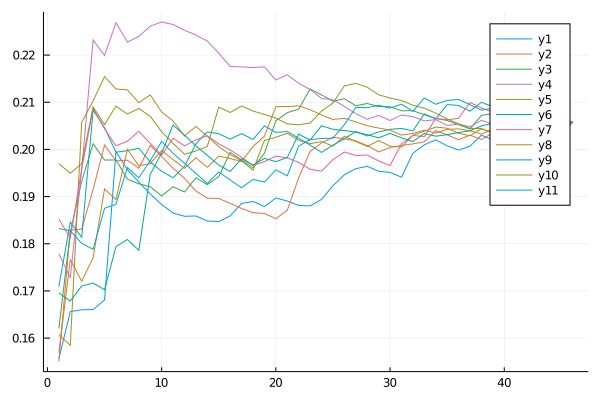

In [24]:
plot([jamon...])

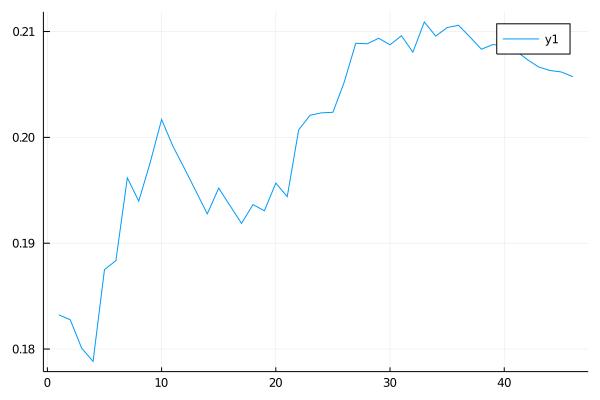

In [22]:
plot(lista)

Caso 2

In [26]:
lista = zeros(Float64, length(lista_extensioneslineales2)-1)
for i in 2:length(lista_extensioneslineales2)
    poset_mn_f = mn(lista_extensioneslineales2[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

In [27]:
jamon2 = [lista]

1-element Array{Array{Float64,1},1}:
 [0.1537598683859113, 0.15460893699148556, 0.16774221253608715, 0.16493384964007662, 0.16568755607882557, 0.1743728913135722, 0.17356065444056112, 0.17919682855305788, 0.1772027243033291, 0.18796215791224513  …  0.20370795991902102, 0.20380930404738518, 0.20376597667183521, 0.20359736693247144, 0.20340172210618007, 0.20346638382456078, 0.20341988320059098, 0.2037488146435182, 0.2037419112066119, 0.20368775478944087]

In [30]:
for _ in 1:10^2
    lista = zeros(Float64, length(lista_extensioneslineales2)-1)
    pepe = randperm(length(lista_extensioneslineales2))
    for i in 2:length(lista_extensioneslineales2)
        poset_mn_f = mn(lista_extensioneslineales2[pepe][1:i]) |> fuzzy
        lista[i-1] = fentropia(poset_mn_f)
    end
    push!(jamon2, lista)
end

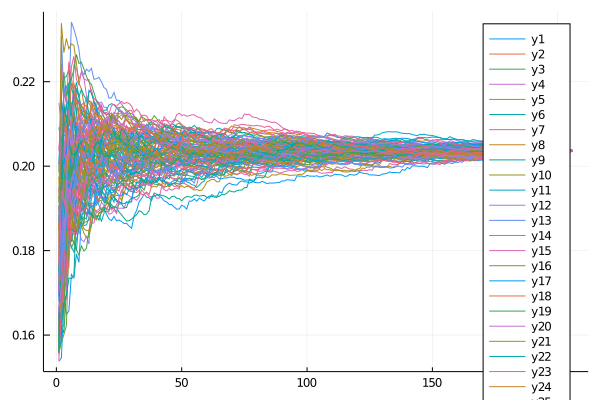

In [31]:
plot([jamon2...])

# Caso 2

In [2]:
posetrandom = Array( caminata_poset(10,10^2) )

10×10 Array{Int64,2}:
 0  1  0  1  0  0  1  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  1  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  1  0  0  1
 0  1  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [9]:
lista_extensioneslineales = [caminatale(posetrandom, 10^2) for _ in 1:10^4]|>unique!;

In [4]:
lista_extensioneslineales2 = [caminatale(posetrandom, 10^2) for _ in 1:10^4]|>unique!;

In [5]:
poset_mn_f = mn(lista_extensioneslineales2) |> fuzzy

10×10 Array{Float64,2}:
 1.0       1.0       1.0       1.0       …  0.571377  0.478849  0.895811
 0.24752   1.0       0.911222  0.580883     0.239843  0.187171  0.597453
 0.257066  0.946365  1.0       0.603286     0.247981  0.194389  0.619634
 0.426109  1.0       1.0       1.0          0.362529  0.296317  0.756531
 0.472718  0.994204  1.0       0.833399     0.461757  0.376846  0.835228
 0.419902  1.0       1.0       0.79857   …  0.405908  0.367446  0.806771
 0.208038  0.840492  0.80928   0.488227     0.201586  0.157315  0.523911
 0.589665  1.0       0.995536  0.878021     1.0       0.500016  1.0
 0.633243  1.0       1.0       0.919619     0.640726  1.0       0.9264
 0.352885  0.950847  0.949527  0.699394     0.38171   0.275958  1.0

In [10]:
fentropia(poset_mn_f)

0.24315286393471458

In [11]:
lista = zeros(Float64, length(lista_extensioneslineales)-1)
for i in 2:length(lista_extensioneslineales)
    poset_mn_f = mn(lista_extensioneslineales[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

In [12]:
jamon = [lista]

1-element Array{Array{Float64,1},1}:
 [0.18046567136642866, 0.17584560129338636, 0.18204630384027876, 0.18417984315933372, 0.1872912433939632, 0.1856590879827144, 0.18377237113554862, 0.1830505379783996, 0.18091684309787864, 0.1843932747397366  …  0.24673871272828404, 0.24663468746143621, 0.2464862875581118, 0.24632388334509295, 0.2463777280632126, 0.24638851250785454, 0.24638200323489873, 0.24650611949179324, 0.24656648470152626, 0.24669959224923962]

In [15]:
for _ in 1:10
    lista = zeros(Float64, length(lista_extensioneslineales)-1)
    pepe = randperm(length(lista_extensioneslineales))
    for i in 2:length(lista_extensioneslineales)
        poset_mn_f = mn(lista_extensioneslineales[pepe][1:i]) |> fuzzy
        lista[i-1] = fentropia(poset_mn_f)
    end
    push!(jamon, lista)
end

In [17]:
pepe=randperm(length(lista_extensioneslineales))

452-element Array{Int64,1}:
 121
 140
 242
 385
  28
 407
  43
 445
 399
 275
 244
 389
 114
   ⋮
 106
 109
 216
 271
  55
 444
  24
  79
 412
 148
 403
 438

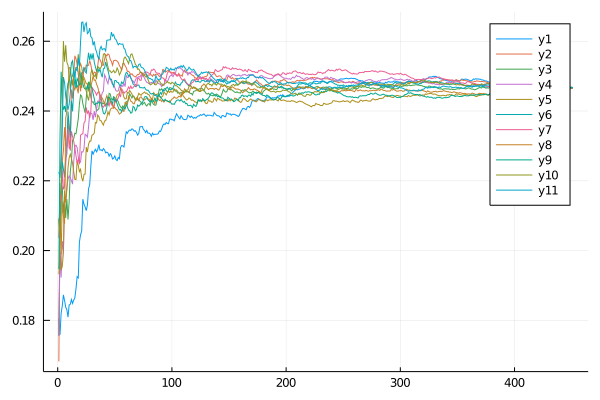

In [18]:
plot([jamon...])

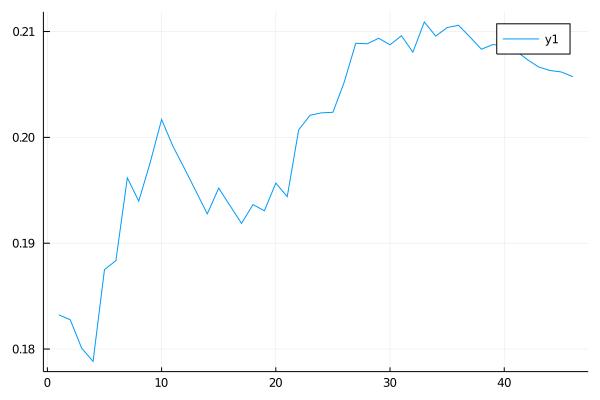

In [22]:
plot(lista)

Caso 2

In [19]:
lista = zeros(Float64, length(lista_extensioneslineales2)-1)
for i in 2:length(lista_extensioneslineales2)
    poset_mn_f = mn(lista_extensioneslineales2[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

In [20]:
jamon2 = [lista]

1-element Array{Array{Float64,1},1}:
 [0.1605308968324875, 0.19427991482572488, 0.19685178566579642, 0.1975053898976844, 0.19493990495905536, 0.19246048649025538, 0.19408127576417206, 0.19269519662475584, 0.19805661003458916, 0.19668184918854584  …  0.24556017206055764, 0.24545031252487493, 0.24547947351599178, 0.2457067929151141, 0.24565917780815963, 0.24556954346124527, 0.24572695489484928, 0.24560534851687252, 0.24564204795462047, 0.2456835029867762]

In [21]:
for _ in 1:10^2
    lista = zeros(Float64, length(lista_extensioneslineales2)-1)
    pepe = randperm(length(lista_extensioneslineales2))
    for i in 2:length(lista_extensioneslineales2)
        poset_mn_f = mn(lista_extensioneslineales2[pepe][1:i]) |> fuzzy
        lista[i-1] = fentropia(poset_mn_f)
    end
    push!(jamon2, lista)
end

In [33]:
mean(matriz[1,:])

0.18469408647711774

In [34]:
promedios = [mean(matriz[i,:]) for i in 1:470]

470-element Array{Float64,1}:
 0.18469408647711774
 0.20205009552218553
 0.2114940031806863
 0.21782692276821525
 0.22198266674348271
 0.22428241688125972
 0.22744203616997796
 0.22894531048717273
 0.22994467390344392
 0.23188175688464746
 0.23395020301887356
 0.2353314445248281
 0.23570853167574246
 ⋮
 0.24569197223081754
 0.2456894101070226
 0.2456887324046472
 0.24570799544524666
 0.2456982194830832
 0.24569229132633127
 0.24568180143375393
 0.24566937958248192
 0.24566349739706878
 0.24566824728403192
 0.2456755936373686
 0.24568350298677624

In [29]:
matriz = hcat(jamon2...)

470×101 Array{Float64,2}:
 0.160531  0.181597  0.194588  0.168122  …  0.197074  0.165431  0.180272
 0.19428   0.268556  0.202492  0.177911     0.223521  0.176563  0.245683
 0.196852  0.263369  0.246857  0.187899     0.210424  0.199594  0.241258
 0.197505  0.250504  0.246891  0.188092     0.22695   0.199548  0.250342
 0.19494   0.247956  0.241029  0.185982     0.231157  0.199564  0.246349
 0.19246   0.25305   0.239839  0.199107  …  0.235119  0.206183  0.241801
 0.194081  0.248774  0.236404  0.1964       0.234241  0.223545  0.243157
 0.192695  0.241864  0.235095  0.195329     0.236598  0.220611  0.240446
 0.198057  0.24514   0.237708  0.209809     0.231921  0.224297  0.241341
 0.196682  0.244174  0.23785   0.21037      0.228977  0.21997   0.237317
 0.202132  0.24375   0.235571  0.214025  …  0.229881  0.224537  0.233725
 0.2034    0.242339  0.240346  0.211336     0.248081  0.225487  0.240742
 0.201864  0.239149  0.237663  0.218897     0.24362   0.228375  0.245764
 ⋮                       

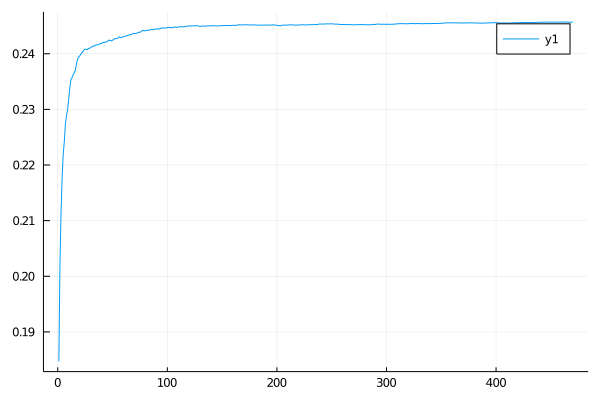

In [35]:
plot(promedios)

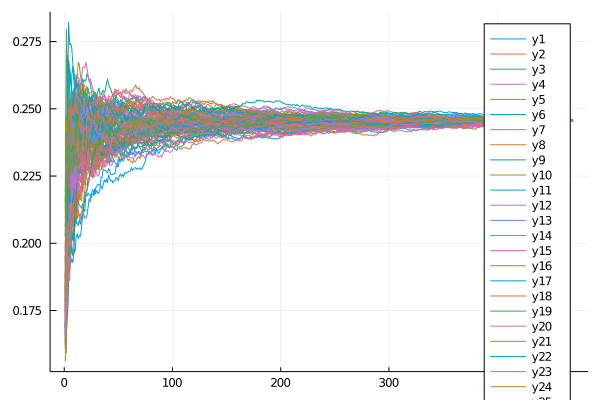

In [22]:
plot([jamon2...])

# Caso universidades

In [36]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")];
numeronodos = 10;
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:numeronodos];
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes];

In [60]:
puntuaciones = hcat([(sort(d, by = first).Points) for d in data_filtrada]...)/100;
poset_mn = puntuaciones |> fuzzy;
poset_a0p95 = αcut_poset(poset_mn, .95)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  1  0  0  1
 1  0  0  0  1  0  1  0  0  1
 1  1  0  1  1  1  1  1  1  1
 1  1  0  0  1  0  1  0  0  1
 0  0  0  0  0  0  1  0  0  1
 1  1  0  0  1  0  1  0  0  1
 0  0  0  0  0  0  0  0  0  0
 1  1  0  0  1  0  1  0  0  1
 1  1  0  0  1  0  1  0  0  1
 0  0  0  0  0  0  0  0  0  0

In [61]:
lista_extensioneslineales = [caminatale(poset_a0p95, 10^2) for _ in 1:10^4]|>unique!;

In [40]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:14]

14-element Array{Array{Int64,1},1}:
 [3, 6, 2, 9, 8, 4, 5, 10, 7, 1]
 [3, 6, 9, 8, 4, 2, 5, 7, 1, 10]
 [3, 9, 6, 8, 4, 2, 1, 5, 7, 10]
 [3, 9, 6, 8, 4, 2, 1, 5, 7, 10]
 [3, 6, 9, 8, 4, 2, 1, 5, 7, 10]
 [3, 6, 9, 8, 4, 2, 1, 5, 7, 10]
 [3, 6, 9, 8, 4, 2, 1, 5, 7, 10]
 [3, 9, 6, 4, 8, 2, 5, 1, 7, 10]
 [3, 6, 4, 9, 8, 2, 5, 1, 7, 10]
 [3, 6, 4, 9, 8, 2, 5, 1, 7, 10]
 [3, 6, 9, 4, 8, 2, 5, 1, 7, 10]
 [3, 6, 4, 9, 8, 5, 2, 1, 7, 10]
 [3, 6, 4, 9, 8, 5, 2, 1, 7, 10]
 [3, 6, 9, 8, 4, 5, 7, 2, 1, 10]

In [72]:
lista = zeros(Float64, length(ranks_univs)-1)
for i in 2:length(ranks_univs)
    poset_mn_f = mn(ranks_univs[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

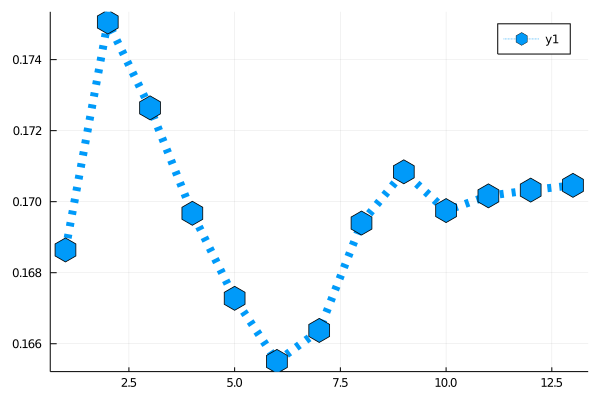

In [73]:
plot(lista,line = (:dot,8)
,marker = ([:hex], 12))

In [62]:
lista = zeros(Float64, length(lista_extensioneslineales)-1)
for i in 2:length(lista_extensioneslineales)
    poset_mn_f = mn(lista_extensioneslineales[1:i]) |> fuzzy
    lista[i-1] = fentropia(poset_mn_f)
end

In [63]:
jamon2 = [lista]

1-element Array{Array{Float64,1},1}:
 [0.16245293707580596, 0.16336665405820747, 0.16655637610364735, 0.1699333323471061, 0.16879620079162694, 0.16898935702632564, 0.1701978838064636, 0.17064664164964546, 0.17301392576856045, 0.17207950502875297  …  0.17755837434857044, 0.17762499681888685, 0.1776882922231709, 0.17775373915626805, 0.17781217178180297, 0.1778141119321617, 0.17782284737753026, 0.17782209678332983, 0.17781326573701456, 0.17781197591278664]

In [64]:
for _ in 1:10^2
    lista = zeros(Float64, length(lista_extensioneslineales)-1)
    pepe = randperm(length(lista_extensioneslineales))
    for i in 2:length(lista_extensioneslineales)
        poset_mn_f = mn(lista_extensioneslineales[pepe][1:i]) |> fuzzy
        lista[i-1] = fentropia(poset_mn_f)
    end
    push!(jamon2, lista)
end

In [65]:
matriz = hcat(jamon2...);

In [69]:
length(lista_extensioneslineales)

71

In [70]:
promedios2 = [mean(matriz[i,:]) for i in 1:length(lista_extensioneslineales)-1]

70-element Array{Float64,1}:
 0.1656270028847978
 0.1695078157676513
 0.17205685739488816
 0.17322590769321833
 0.17386771844627988
 0.1745544123343004
 0.1749329627345403
 0.17526997878229608
 0.175685679866403
 0.17579167344837252
 0.17594372905098038
 0.17611343020308332
 0.1762945836410844
 ⋮
 0.17771080483671842
 0.17771016297436024
 0.17771488092663018
 0.17772463244614764
 0.17773733059155344
 0.17774580743742796
 0.17775252801913677
 0.17775585707296515
 0.17776252177574395
 0.17777644415051774
 0.1777933662262541
 0.17781197591278664

In [ ]:
plot(lista,line = (:dot,8)
,marker = ([:hex], 12))

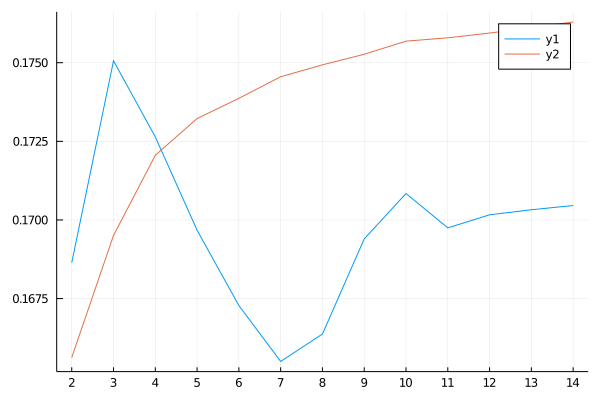

In [77]:
plot([lista promedios2[1:13]]
,xticks=(1:13, 2:14))